In [57]:
# # Fase 1 - Pré-processamento e Exploração de Dados
# ## Projeto: Previsão de Chuva com Machine Learning
# 
# **Objetivo:** Analisar dados meteorológicos do INMET para entender padrões relacionados à ocorrência de chuva

# %% [markdown]
# ### 1. Importação de Bibliotecas e Configuração

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Adicionar o diretório src ao path para importar funções utilitárias
sys.path.append(str(Path.cwd().parent / 'src' / 'utils'))

from load_data import carregar_dados_inmet
from df_custom_info import df_custom_info

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [58]:
# ### 2. Carregamento dos Dados

# Carregar múltiplos arquivos (RECOMENDADO para mais dados)
from pathlib import Path

data_dir = Path("../data")
arquivos_inmet = list(data_dir.glob("*inmet*.csv")) 

if len(arquivos_inmet) == 0:
    print("⚠️ Nenhum arquivo INMET encontrado!")
    print(f"   Procurado em: {data_dir.absolute()}")
    print(f"\n💡 Coloque seus arquivos CSV do INMET na pasta 'data/'")
    print(f"   Nomeie como: dados_inmet_2022.csv, dados_inmet_2023.csv, etc.")
else:
    print(f"📁 Arquivos encontrados: {len(arquivos_inmet)}")
    for arquivo in arquivos_inmet:
        print(f"   - {arquivo.name}")
    
    # Carregar todos os arquivos e concatenar
    dfs = []
    for arquivo in arquivos_inmet:
        try:
            df_temp = carregar_dados_inmet(str(arquivo))
            dfs.append(df_temp)
            print(f"   ✅ {arquivo.name}: {len(df_temp)} registros")
        except Exception as e:
            print(f"   ❌ Erro ao carregar {arquivo.name}: {str(e)[:100]}")
    
    if dfs:
        df = pd.concat(dfs, ignore_index=True)
        print(f"\n✅ Dataset consolidado criado!")
        print(f"   Total de registros: {len(df)}")
        print(f"   Período: {len(arquivos_inmet)} arquivo(s)")
    else:
        print("❌ Nenhum arquivo carregado com sucesso")

df.head()

📁 Arquivos encontrados: 3
   - dados_inmet_2022.CSV
   - dados_inmet_2023.CSV
   - dados_inmet_2024.CSV
   ✅ dados_inmet_2022.CSV: 8760 registros
   ✅ dados_inmet_2023.CSV: 8760 registros
   ✅ dados_inmet_2024.CSV: 8784 registros

✅ Dataset consolidado criado!
   Total de registros: 26304
   Período: 3 arquivo(s)


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2022/01/01,0000 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/01/01,0100 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/01/01,0200 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022/01/01,0300 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022/01/01,0400 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# ### 3. Análise Inicial dos Dados

# %%
# Usar função customizada para análise detalhada
info_df = df_custom_info(df)
print("\n📊 Informações Resumidas do DataFrame:\n")
display(info_df)

# %%
# Diagnóstico: Verificar quais colunas não são numéricas
print("\n🔍 DIAGNÓSTICO: Tipos de dados detectados\n")
print(df.dtypes.value_counts())

print("\n📋 Amostra de dados brutos (primeiras 3 linhas):")
display(df.head(3))

# Verificar se há valores não-numéricos em colunas que deveriam ser numéricas
print("\n⚠️ Verificando valores não-numéricos em colunas potencialmente numéricas:")
for col in df.columns:
    if df[col].dtype == 'object' and col not in ['Data', 'Hora', 'Data Medicao', 'Hora Medicao']:
        # Mostrar valores únicos (limitado a 5)
        valores_unicos = df[col].dropna().unique()[:5]
        print(f"   {col}: {valores_unicos}")

# %%
# Estatísticas descritivas
print("\n📈 Estatísticas Descritivas:\n")
df.describe()


📊 Informações Resumidas do DataFrame:



,Coluna,Tipo,Nulos,% Nulos,Valores Únicos,Exemplos
0,Data,object,0,0.00,1096,"[2022/01/01, 2022/01/02, 2022/01/03]"
1,Hora UTC,object,0,0.00,24,"[0000 UTC, 0100 UTC, 0200 UTC]"
2,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",object,7095,26.97,77,"[0, ,4, 1,8]"
3,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",object,4892,18.60,237,"[918, 917,8, 917,4]"
4,PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),object,4911,18.67,235,"[918, 917,8, 917,4]"
5,PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),object,4911,18.67,231,"[917,8, 917,4, 916,8]"
6,RADIACAO GLOBAL (Kj/m²),object,14233,54.11,9410,"[823, 2329,3, 3416,8]"
7,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",object,4894,18.61,314,"[28,3, 29,1, 27,5]"
8,TEMPERATURA DO PONTO DE ORVALHO (°C),object,4895,18.61,226,"[20,1, 18,8, 19,1]"
9,TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),object,4914,18.68,319,"[29,7, 28,1, 27,7]"



🔍 DIAGNÓSTICO: Tipos de dados detectados

object     15
float64     5
Name: count, dtype: int64

📋 Amostra de dados brutos (primeiras 3 linhas):


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2022/01/01,0000 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022/01/01,0100 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022/01/01,0200 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



⚠️ Verificando valores não-numéricos em colunas potencialmente numéricas:
   Hora UTC: ['0000 UTC' '0100 UTC' '0200 UTC' '0300 UTC' '0400 UTC']
   PRECIPITAÇÃO TOTAL, HORÁRIO (mm): ['0' ',4' '1,8' '1,2' ',2']
   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): ['918' '917,8' '917,4' '916,8' '916,3']
   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB): ['918' '917,8' '917,4' '916,8' '916,4']
   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB): ['917,8' '917,4' '916,8' '916,3' '916,1']
   RADIACAO GLOBAL (Kj/m²): ['823' '2329,3' '3416,8' '2779,2' '2170,2']
   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): ['28,3' '29,1' '27,5' '27,6' '26,2']
   TEMPERATURA DO PONTO DE ORVALHO (°C): ['20,1' '18,8' '19,1' '19,8' '20']
   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C): ['29,7' '28,1' '27,7' '24,7' '25,3']
   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C): ['27,1' '26,5' '25,9' '24,5' '23,9']
   TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C): ['20' '20,8' '21,1' '20,1' '20,2']
   TEMPERATURA 

,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))",Unnamed: 19
count,21389.000000,21389.000000,21409.000000,11170.000000,0.0
mean,83.640610,77.830427,80.789481,179.979588,NaN
std,16.287372,19.278124,17.931195,113.779573,NaN
min,18.000000,12.000000,14.000000,1.000000,NaN
25%,74.000000,64.000000,69.000000,68.000000,NaN
50%,90.000000,84.000000,87.000000,176.000000,NaN
75%,96.000000,94.000000,95.000000,286.000000,NaN
max,100.000000,100.000000,100.000000,360.000000,NaN


In [70]:
# ### 4. Limpeza e Tratamento de Dados

# %%
# Identificar colunas numéricas (exceto Data/Hora)
colunas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n🔢 Colunas numéricas identificadas: {len(colunas_numericas)}")
print(colunas_numericas[:10])  # Mostrar primeiras 10

# %%
# Verificar valores nulos por coluna
print("\n❌ Colunas com valores nulos:\n")
nulos = df.isnull().sum()
nulos_pct = (nulos / len(df)) * 100
df_nulos = pd.DataFrame({
    'Valores Nulos': nulos[nulos > 0],
    '% Nulos': nulos_pct[nulos > 0]
}).sort_values('% Nulos', ascending=False)

if not df_nulos.empty:
    display(df_nulos)
else:
    print("✅ Nenhum valor nulo encontrado!")

# %%
# Tratamento de dados e conversão para numérico
df_clean = df.copy()

print("🔧 Convertendo colunas para formato numérico...")

# Converter todas as colunas numéricas (exceto Data/Hora)
colunas_para_converter = [col for col in df_clean.columns 
                          if col not in ['Data', 'Hora', 'Data Medicao', 'Hora Medicao']]

for col in colunas_para_converter:
    # Tentar converter para numérico
    # Substituir vírgulas por pontos (padrão brasileiro)
    try:
        df_clean[col] = pd.to_numeric(
            df_clean[col].astype(str).str.replace(',', '.').str.strip(),
            errors='coerce'
        )
    except:
        pass  # Manter como está se não conseguir converter

# Atualizar lista de colunas numéricas após conversão
colunas_numericas = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print(f"✅ Conversão concluída. Total de colunas numéricas: {len(colunas_numericas)}")

# Verificar qualidade da conversão
print("\n🔍 Validação da conversão:")
for col in colunas_numericas[:5]:  # Verificar primeiras 5 colunas
    n_validos = df_clean[col].notna().sum()
    pct_validos = (n_validos / len(df_clean)) * 100
    print(f"   {col}: {n_validos} valores válidos ({pct_validos:.1f}%)")

# Tratamento de valores nulos
print("\n🔧 Tratando valores nulos...")
for col in colunas_numericas:
    if df_clean[col].isnull().sum() > 0:
        # Usar interpolação linear para séries temporais
        df_clean[col] = df_clean[col].interpolate(method='linear', limit_direction='both')

print(f"✅ Valores nulos tratados. Total após limpeza: {df_clean.isnull().sum().sum()}")


🔢 Colunas numéricas identificadas: 5
['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'Unnamed: 19']

❌ Colunas com valores nulos:



,Valores Nulos,% Nulos
Unnamed: 19,26304,100.000000
"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",15134,57.534976
RADIACAO GLOBAL (Kj/m²),14233,54.109641
"VENTO, RAJADA MAXIMA (m/s)",11514,43.772810
"VENTO, VELOCIDADE HORARIA (m/s)",11502,43.727190
"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",7095,26.973084
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),4915,18.685371
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),4915,18.685371
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),4915,18.685371
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),4915,18.685371


🔧 Convertendo colunas para formato numérico...
✅ Conversão concluída. Total de colunas numéricas: 19

🔍 Validação da conversão:
   Hora UTC: 0 valores válidos (0.0%)
   PRECIPITAÇÃO TOTAL, HORÁRIO (mm): 19209 valores válidos (73.0%)
   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB): 21412 valores válidos (81.4%)
   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB): 21393 valores válidos (81.3%)
   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB): 21393 valores válidos (81.3%)

🔧 Tratando valores nulos...
✅ Valores nulos tratados. Total após limpeza: 52608


In [71]:
# ### 5. Criação da Variável Target: Chuva Binária

# %%
# Identificar coluna de precipitação (pode ter nomes diferentes)
possible_names = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'Precipitacao', 'CHUVA', 'Chuva']
col_precipitacao = None

for name in possible_names:
    if name in df_clean.columns:
        col_precipitacao = name
        break

if col_precipitacao:
    print(f"📍 Coluna de precipitação identificada: '{col_precipitacao}'")
    
    # Converter para numérico, substituindo vírgulas por pontos e tratando erros
    df_clean[col_precipitacao] = pd.to_numeric(
        df_clean[col_precipitacao].astype(str).str.replace(',', '.'),
        errors='coerce'
    )
    
    print(f"✅ Coluna convertida para numérico")
    print(f"   Tipo atual: {df_clean[col_precipitacao].dtype}")
    print(f"   Valores nulos após conversão: {df_clean[col_precipitacao].isna().sum()}")
    
    # Criar variável binária: 1 se choveu (>0mm), 0 caso contrário
    df_clean['Chuva'] = (df_clean[col_precipitacao] > 0).astype(int)
    
    # Estatísticas da variável target
    print(f"\n☔ Distribuição da variável 'Chuva':")
    print(df_clean['Chuva'].value_counts())
    print(f"\n% de períodos com chuva: {df_clean['Chuva'].mean() * 100:.2f}%")
    print(f"\n📊 Estatísticas de precipitação:")
    print(df_clean[col_precipitacao].describe())
else:
    print("⚠️ Coluna de precipitação não encontrada. Ajuste os nomes possíveis.")

📍 Coluna de precipitação identificada: 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'
✅ Coluna convertida para numérico
   Tipo atual: float64
   Valores nulos após conversão: 0

☔ Distribuição da variável 'Chuva':
Chuva
0    24681
1     1623
Name: count, dtype: int64

% de períodos com chuva: 6.17%

📊 Estatísticas de precipitação:
count    26304.000000
mean         0.079486
std          0.761762
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         32.400000
Name: PRECIPITAÇÃO TOTAL, HORÁRIO (mm), dtype: float64


In [72]:
# ### 6. Análise de Outliers

# %%
# Identificar outliers usando IQR (Interquartile Range)
def detectar_outliers(df, coluna):
    """Detecta outliers usando método IQR"""
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < lower_bound) | (df[coluna] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\n🔍 Análise de Outliers (método IQR):\n")
outliers_info = []

for col in colunas_numericas[:5]:  # Analisar primeiras 5 colunas numéricas
    if col in df_clean.columns:
        n_outliers, lb, ub = detectar_outliers(df_clean, col)
        outliers_info.append({
            'Coluna': col,
            'N° Outliers': n_outliers,
            '% Outliers': round((n_outliers / len(df_clean)) * 100, 2),
            'Limite Inferior': round(lb, 2),
            'Limite Superior': round(ub, 2)
        })

pd.DataFrame(outliers_info)


🔍 Análise de Outliers (método IQR):



,Coluna,N° Outliers,% Outliers,Limite Inferior,Limite Superior
0,Hora UTC,0,0.00,NaN,NaN
1,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",1623,6.17,0.00,0.00
2,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",317,1.21,910.55,926.95
3,PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),352,1.34,911.00,927.00
4,PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),377,1.43,910.50,926.50


C:\Users\Gabriel Rodrigues\AppData\Local\Temp\ipykernel_18536\4226578030.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([dados_sem_chuva, dados_com_chuva],


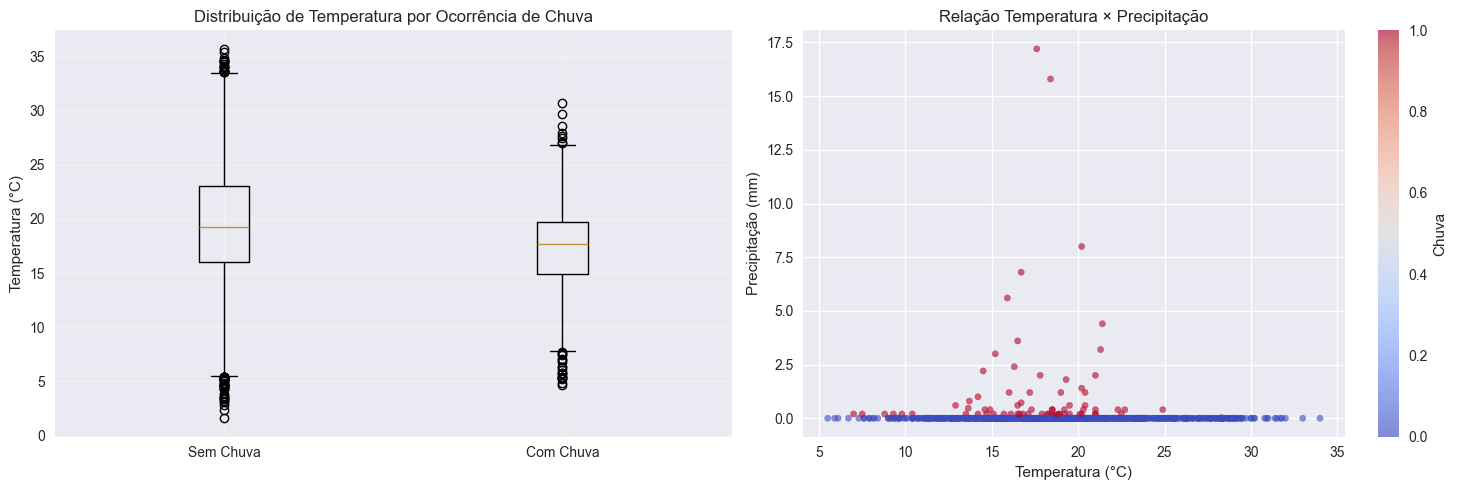


📊 Temperatura média:
   Sem chuva: 19.60°C
   Com chuva: 17.23°C
   Diferença: 2.37°C

✅ Visualização criada com 26304 registros válidos


In [73]:
# ### 7. Visualizações Exploratórias

# %% [markdown]
# #### 7.1 Temperatura × Chuva

# %%
# Identificar coluna de temperatura
temp_cols = [col for col in df_clean.columns if 'TEMPERATURA' in col.upper() or 'TEMP' in col.upper()]

if temp_cols and col_precipitacao:
    temp_col = temp_cols[0]
    
    # Garantir que as colunas são numéricas
    df_clean[temp_col] = pd.to_numeric(df_clean[temp_col], errors='coerce')
    df_clean[col_precipitacao] = pd.to_numeric(df_clean[col_precipitacao], errors='coerce')
    
    # Criar DataFrame para visualização (remover NaN e inf)
    df_plot = df_clean[[temp_col, col_precipitacao, 'Chuva']].copy()
    df_plot = df_plot.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Verificar se há dados suficientes
    if len(df_plot) < 10:
        print("⚠️ Dados insuficientes após limpeza para criar visualizações")
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Gráfico 1: Boxplot Temperatura vs Chuva
        dados_sem_chuva = df_plot[df_plot['Chuva']==0][temp_col].values
        dados_com_chuva = df_plot[df_plot['Chuva']==1][temp_col].values
        
        if len(dados_sem_chuva) > 0 and len(dados_com_chuva) > 0:
            axes[0].boxplot([dados_sem_chuva, dados_com_chuva],
                           labels=['Sem Chuva', 'Com Chuva'])
            axes[0].set_ylabel('Temperatura (°C)')
            axes[0].set_title('Distribuição de Temperatura por Ocorrência de Chuva')
            axes[0].grid(True, alpha=0.3)
        
        # Gráfico 2: Scatter plot
        sample_size = min(1000, len(df_plot))
        sample = df_plot.sample(sample_size) if len(df_plot) > sample_size else df_plot
        
        scatter = axes[1].scatter(sample[temp_col], sample[col_precipitacao], 
                                 c=sample['Chuva'], cmap='coolwarm', alpha=0.6, s=20)
        axes[1].set_xlabel('Temperatura (°C)')
        axes[1].set_ylabel('Precipitação (mm)')
        axes[1].set_title('Relação Temperatura × Precipitação')
        plt.colorbar(scatter, ax=axes[1], label='Chuva')
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas
        sem_chuva = df_plot[df_plot['Chuva']==0][temp_col]
        com_chuva = df_plot[df_plot['Chuva']==1][temp_col]
        
        if len(sem_chuva) > 0 and len(com_chuva) > 0:
            print(f"\n📊 Temperatura média:")
            print(f"   Sem chuva: {sem_chuva.mean():.2f}°C")
            print(f"   Com chuva: {com_chuva.mean():.2f}°C")
            print(f"   Diferença: {abs(sem_chuva.mean() - com_chuva.mean()):.2f}°C")
        
        print(f"\n✅ Visualização criada com {len(df_plot)} registros válidos")
else:
    print("⚠️ Colunas de temperatura ou precipitação não encontradas")

C:\Users\Gabriel Rodrigues\AppData\Local\Temp\ipykernel_18536\335443164.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([dados_sem_chuva, dados_com_chuva],


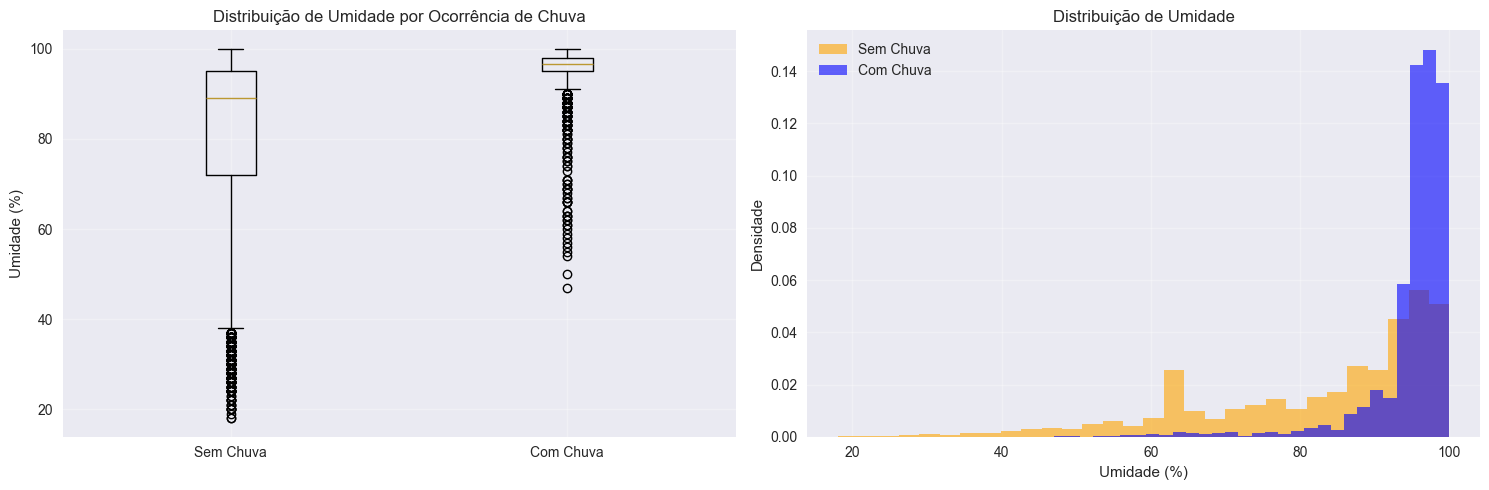


📊 Umidade média:
   Sem chuva: 82.83%
   Com chuva: 95.18%
   Diferença: 12.35%

✅ Visualização criada com 26304 registros válidos


In [74]:
# #### 7.2 Umidade × Chuva

# %%
# Identificar coluna de umidade
umid_cols = [col for col in df_clean.columns if 'UMIDADE' in col.upper() or 'UMID' in col.upper()]

if umid_cols and col_precipitacao:
    umid_col = umid_cols[0]
    
    # Garantir que as colunas são numéricas
    df_clean[umid_col] = pd.to_numeric(df_clean[umid_col], errors='coerce')
    
    # Criar DataFrame para visualização
    df_plot = df_clean[[umid_col, 'Chuva']].copy()
    df_plot = df_plot.replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(df_plot) < 10:
        print("⚠️ Dados insuficientes após limpeza para criar visualizações")
    else:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Gráfico 1: Boxplot Umidade vs Chuva
        dados_sem_chuva = df_plot[df_plot['Chuva']==0][umid_col].values
        dados_com_chuva = df_plot[df_plot['Chuva']==1][umid_col].values
        
        if len(dados_sem_chuva) > 0 and len(dados_com_chuva) > 0:
            axes[0].boxplot([dados_sem_chuva, dados_com_chuva],
                           labels=['Sem Chuva', 'Com Chuva'])
            axes[0].set_ylabel('Umidade (%)')
            axes[0].set_title('Distribuição de Umidade por Ocorrência de Chuva')
            axes[0].grid(True, alpha=0.3)
        
        # Gráfico 2: Histograma comparativo
        axes[1].hist(dados_sem_chuva, bins=30, alpha=0.6, 
                    label='Sem Chuva', density=True, color='orange')
        axes[1].hist(dados_com_chuva, bins=30, alpha=0.6, 
                    label='Com Chuva', density=True, color='blue')
        axes[1].set_xlabel('Umidade (%)')
        axes[1].set_ylabel('Densidade')
        axes[1].set_title('Distribuição de Umidade')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Estatísticas
        sem_chuva = df_plot[df_plot['Chuva']==0][umid_col]
        com_chuva = df_plot[df_plot['Chuva']==1][umid_col]
        
        if len(sem_chuva) > 0 and len(com_chuva) > 0:
            print(f"\n📊 Umidade média:")
            print(f"   Sem chuva: {sem_chuva.mean():.2f}%")
            print(f"   Com chuva: {com_chuva.mean():.2f}%")
            print(f"   Diferença: {abs(sem_chuva.mean() - com_chuva.mean()):.2f}%")
        
        print(f"\n✅ Visualização criada com {len(df_plot)} registros válidos")
else:
    print("⚠️ Colunas de umidade não encontradas")

🔍 Selecionando features para matriz de correlação...
   ✅ TEMPERATURA: 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)' (26304 valores)
   ✅ UMIDADE: 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)' (26304 valores)
   ✅ PRESSAO: 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)' (26304 valores)
   ✅ VENTO: 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))' (26304 valores)
   ✅ RADIACAO: 'RADIACAO GLOBAL (Kj/m²)' (26304 valores)
   ✅ TARGET: 'Chuva' (26304 valores)

📊 Total de features selecionadas: 6

✅ Registros após limpeza: 26304 (100.0% do total)


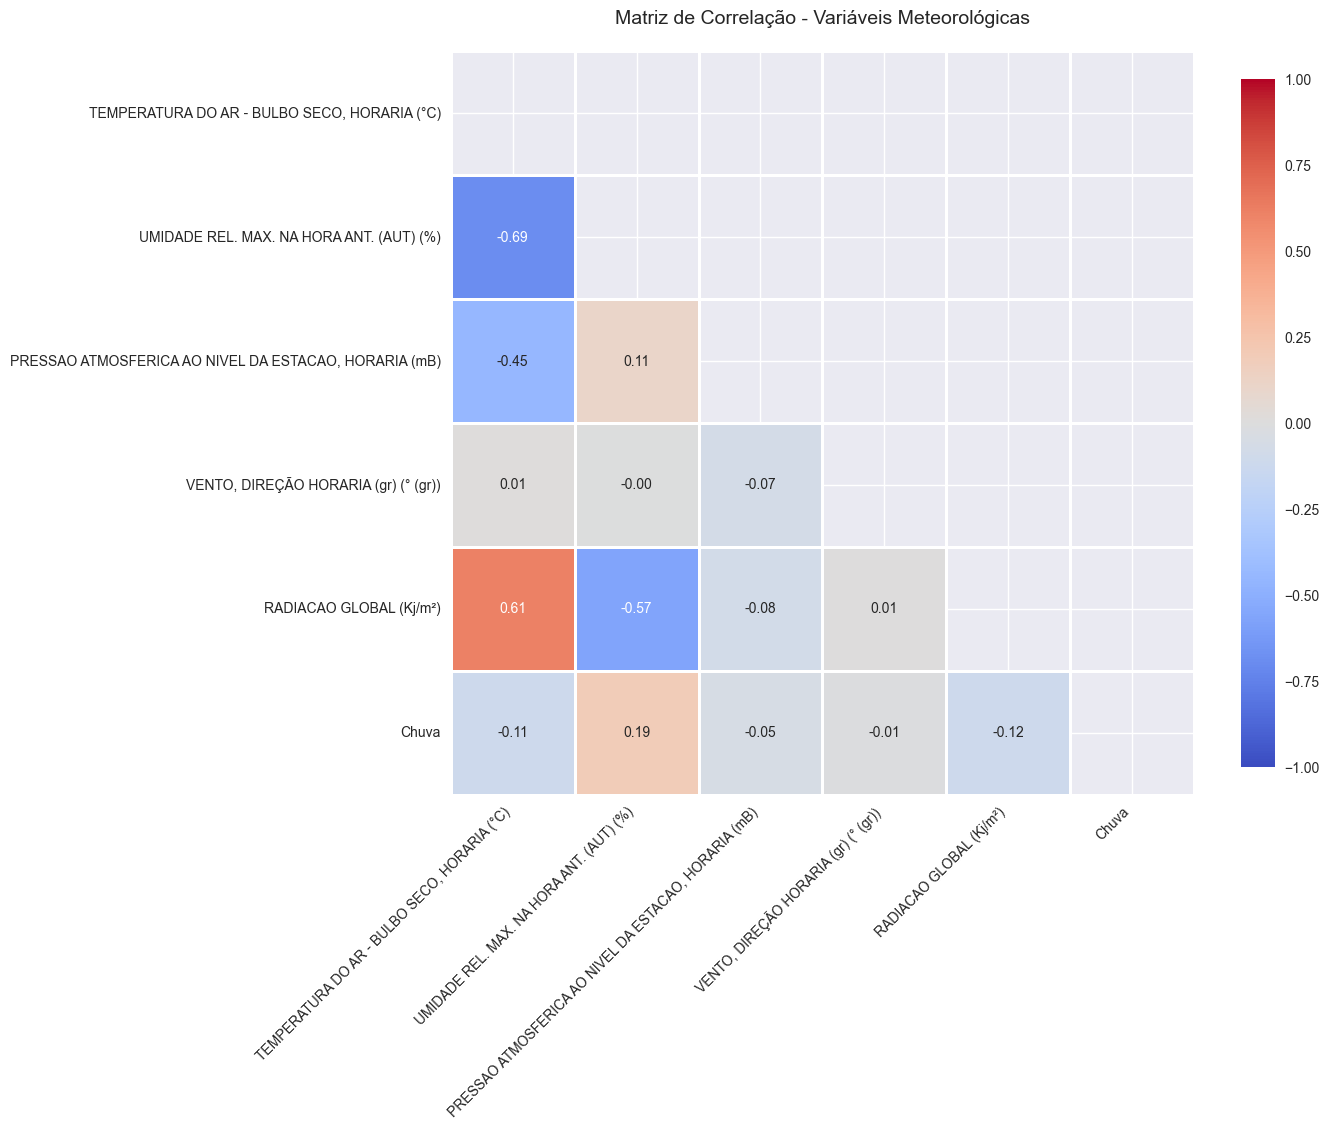


🔗 Correlações com a variável 'Chuva':



,Variável,Correlação,Classificação
0,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),0.189465,🟢 Fraca
1,"VENTO, DIREÇÃO HORARIA (gr) (° (gr))",-0.009865,⚪ Muito Fraca
2,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR...",-0.049473,⚪ Muito Fraca
3,"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",-0.111288,🟢 Fraca
4,RADIACAO GLOBAL (Kj/m²),-0.117145,🟢 Fraca



✅ Matriz de correlação criada com 26304 registros
   (usando correlação pairwise - ignora NaN em cada par)


In [75]:
# #### 7.3 Matriz de Correlação

# %%
# Selecionar principais variáveis meteorológicas para correlação
print("🔍 Selecionando features para matriz de correlação...")

# Buscar colunas relevantes (MAIS FLEXÍVEL)
palavras_chave = ['TEMPERATURA', 'UMIDADE', 'PRESSAO', 'VENTO', 'RADIACAO', 'PRECIPITACAO']
features_importantes = []

for palavra in palavras_chave:
    cols = [col for col in df_clean.columns if palavra in col.upper()]
    if cols:
        # Pegar a coluna com MENOS valores nulos
        melhor_col = min(cols, key=lambda c: df_clean[c].isna().sum())
        features_importantes.append(melhor_col)
        print(f"   ✅ {palavra}: '{melhor_col}' ({df_clean[melhor_col].notna().sum()} valores)")

# Adicionar a variável target
if 'Chuva' in df_clean.columns:
    features_importantes.append('Chuva')
    print(f"   ✅ TARGET: 'Chuva' ({df_clean['Chuva'].notna().sum()} valores)")

print(f"\n📊 Total de features selecionadas: {len(features_importantes)}")

# Criar matriz de correlação COM ESTRATÉGIA MAIS FLEXÍVEL
if len(features_importantes) > 1:
    # Garantir que todas as colunas são numéricas
    df_corr = df_clean[features_importantes].copy()
    
    for col in df_corr.columns:
        df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')
    
    # Remover NaN e inf
    df_corr = df_corr.replace([np.inf, -np.inf], np.nan)
    
    # NOVO: Aceitar linhas com PELO MENOS 3 valores válidos (não precisa estar completa)
    df_corr = df_corr.dropna(thresh=3)
    
    print(f"\n✅ Registros após limpeza: {len(df_corr)} ({len(df_corr)/len(df_clean)*100:.1f}% do total)")
    
    if len(df_corr) < 100:
        print("⚠️ AINDA insuficiente. Verificando cada coluna individualmente...")
        for col in features_importantes:
            n_valid = df_clean[col].notna().sum()
            print(f"   {col}: {n_valid} valores válidos")
    else:
        # Calcular correlação usando pairwise (ignora NaN em cada par)
        correlation_matrix = df_corr.corr(method='pearson', min_periods=100)
        
        plt.figure(figsize=(14, 12))
        
        # Criar heatmap
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                    mask=mask, vmin=-1, vmax=1)
        plt.title('Matriz de Correlação - Variáveis Meteorológicas', fontsize=14, pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Top correlações com Chuva
        if 'Chuva' in correlation_matrix.columns:
            print("\n🔗 Correlações com a variável 'Chuva':\n")
            chuva_corr = correlation_matrix['Chuva'].drop('Chuva').sort_values(ascending=False)
            
            # Criar DataFrame mais legível
            df_result = pd.DataFrame({
                'Variável': chuva_corr.index,
                'Correlação': chuva_corr.values,
                'Força': chuva_corr.abs().values
            }).sort_values('Correlação', ascending=False)
            
            # Classificar correlação
            def classificar_corr(val):
                abs_val = abs(val)
                if abs_val > 0.7: return '🔴 Muito Forte'
                elif abs_val > 0.5: return '🟠 Forte'
                elif abs_val > 0.3: return '🟡 Moderada'
                elif abs_val > 0.1: return '🟢 Fraca'
                else: return '⚪ Muito Fraca'
            
            df_result['Classificação'] = df_result['Correlação'].apply(classificar_corr)
            display(df_result[['Variável', 'Correlação', 'Classificação']])
        
        print(f"\n✅ Matriz de correlação criada com {len(df_corr)} registros")
        print(f"   (usando correlação pairwise - ignora NaN em cada par)")
else:
    print("⚠️ Variáveis insuficientes para criar matriz de correlação")

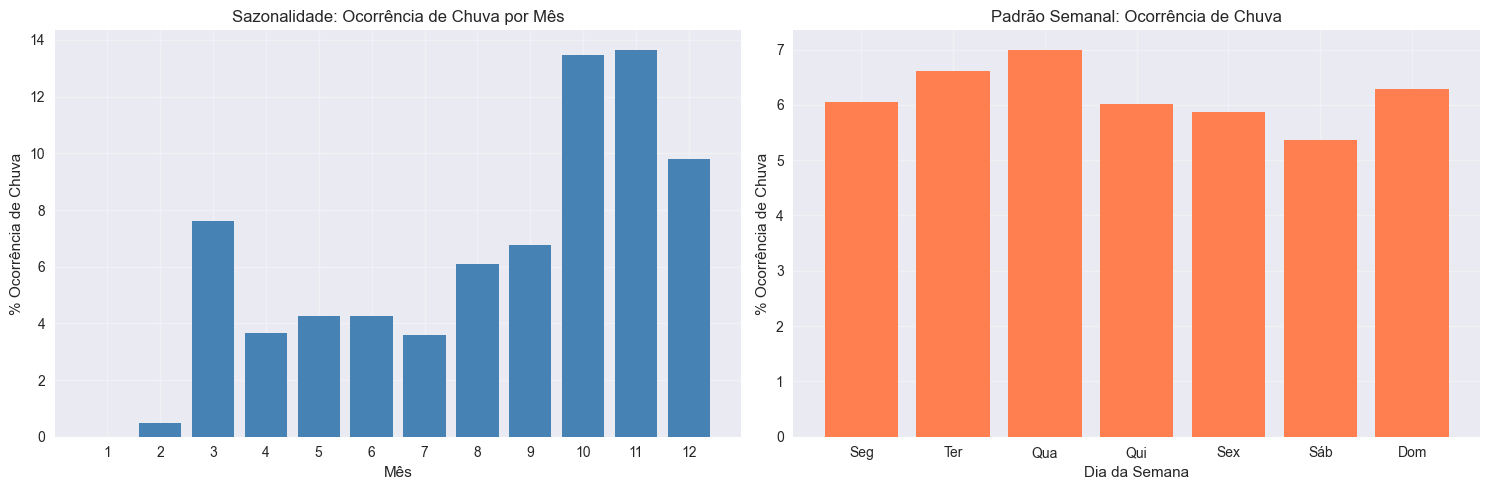

In [76]:
# ### 8. Análise Temporal

# %%
# Se houver colunas de Data e Hora, criar análise temporal
if 'Data' in df_clean.columns:
    try:
        # Converter para datetime
        df_clean['Data'] = pd.to_datetime(df_clean['Data'], format='%Y/%m/%d', errors='coerce')
        
        # Extrair features temporais
        df_clean['Mes'] = df_clean['Data'].dt.month
        df_clean['Dia_Semana'] = df_clean['Data'].dt.dayofweek
        
        # Visualizar sazonalidade
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Chuva por mês
        chuva_mes = df_clean.groupby('Mes')['Chuva'].mean() * 100
        axes[0].bar(chuva_mes.index, chuva_mes.values, color='steelblue')
        axes[0].set_xlabel('Mês')
        axes[0].set_ylabel('% Ocorrência de Chuva')
        axes[0].set_title('Sazonalidade: Ocorrência de Chuva por Mês')
        axes[0].set_xticks(range(1, 13))
        axes[0].grid(True, alpha=0.3)
        
        # Chuva por dia da semana
        chuva_dia = df_clean.groupby('Dia_Semana')['Chuva'].mean() * 100
        dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
        axes[1].bar(range(7), chuva_dia.values, color='coral')
        axes[1].set_xlabel('Dia da Semana')
        axes[1].set_ylabel('% Ocorrência de Chuva')
        axes[1].set_title('Padrão Semanal: Ocorrência de Chuva')
        axes[1].set_xticks(range(7))
        axes[1].set_xticklabels(dias)
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"⚠️ Erro na análise temporal: {e}")

In [77]:
# ### 9. Conclusões da Análise Exploratória

# %%
print("=" * 80)
print("📋 RESUMO DA ANÁLISE EXPLORATÓRIA")
print("=" * 80)
print(f"\n✅ Dados carregados: {len(df_clean)} registros")
print(f"✅ Variáveis numéricas: {len(colunas_numericas)}")
print(f"✅ Variável target 'Chuva' criada com sucesso")

if col_precipitacao:
    pct_chuva = df_clean['Chuva'].mean() * 100
    print(f"✅ Taxa de ocorrência de chuva: {pct_chuva:.2f}%")

# Avaliar qualidade dos dados
registros_completos = df_clean[colunas_numericas].dropna().shape[0]
pct_completos = (registros_completos / len(df_clean)) * 100

print(f"\n📊 QUALIDADE DOS DADOS:")
print(f"   Registros com todos os dados: {registros_completos} ({pct_completos:.1f}%)")

# Recomendações baseadas na qualidade
print(f"\n💡 RECOMENDAÇÕES:")
if pct_completos < 50:
    print("   ⚠️ CRÍTICO: Menos de 50% dos dados são válidos!")
    print("   📥 Recomendação: Baixar dados de ANOS ANTERIORES (2022-2024)")
    print("   🔧 Alternativa: Usar interpolação mais agressiva")
    print("   🎯 Focar em períodos específicos com mais dados")
elif pct_completos < 70:
    print("   ⚠️ ATENÇÃO: Dados limitados, mas utilizáveis")
    print("   📥 Sugestão: Complementar com 1-2 anos anteriores")
    print("   🔧 Usar técnicas de imputação avançadas")
else:
    print("   ✅ Dados suficientes para análise!")
    print("   📊 Pode prosseguir com modelagem")

print(f"\n📊 Próximos passos:")
print("   1. Feature Engineering (criar novas variáveis)")
print("   2. Normalização/Padronização dos dados")
print("   3. Balanceamento de classes (se necessário)")
print("   4. Treinar modelos de Machine Learning")

# URLs para download de dados INMET
print(f"\n🔗 ONDE BAIXAR MAIS DADOS:")
print("   INMET: https://portal.inmet.gov.br/dadoshistoricos")
print("   Período recomendado: 2022-2024 (mesma estação)")
print("=" * 80)

📋 RESUMO DA ANÁLISE EXPLORATÓRIA

✅ Dados carregados: 26304 registros
✅ Variáveis numéricas: 19
✅ Variável target 'Chuva' criada com sucesso
✅ Taxa de ocorrência de chuva: 6.17%

📊 QUALIDADE DOS DADOS:
   Registros com todos os dados: 0 (0.0%)

💡 RECOMENDAÇÕES:
   ⚠️ CRÍTICO: Menos de 50% dos dados são válidos!
   📥 Recomendação: Baixar dados de ANOS ANTERIORES (2022-2024)
   🔧 Alternativa: Usar interpolação mais agressiva
   🎯 Focar em períodos específicos com mais dados

📊 Próximos passos:
   1. Feature Engineering (criar novas variáveis)
   2. Normalização/Padronização dos dados
   3. Balanceamento de classes (se necessário)
   4. Treinar modelos de Machine Learning

🔗 ONDE BAIXAR MAIS DADOS:
   INMET: https://portal.inmet.gov.br/dadoshistoricos
   Período recomendado: 2022-2024 (mesma estação)


In [79]:
# ### 10. Salvar DataFrame Processado

# %%
# ESTRATÉGIA INTELIGENTE: Salvar apenas features com boa qualidade de dados
print("💾 Preparando dados para salvamento...")

# Selecionar features com pelo menos 70% de dados válidos
threshold_validade = 0.70
features_validas = []

for col in colunas_numericas:
    pct_valido = df_clean[col].notna().sum() / len(df_clean)
    if pct_valido >= threshold_validade:
        features_validas.append(col)

print(f"\n✅ Features selecionadas (≥{threshold_validade*100:.0f}% dados válidos): {len(features_validas)}")

# Adicionar colunas essenciais que EXISTEM no DataFrame
colunas_finais = []
colunas_temporais = ['Data', 'Hora', 'Data Medicao', 'Hora Medicao', 'DATA (YYYY-MM-DD)', 'HORA (UTC)']

for col in colunas_temporais:
    if col in df_clean.columns:
        colunas_finais.append(col)
        print(f"   ✅ Coluna temporal encontrada: '{col}'")

# Adicionar features válidas
colunas_finais.extend(features_validas)

# Adicionar variável target se existir
if 'Chuva' in df_clean.columns:
    colunas_finais.append('Chuva')

# Remover duplicatas mantendo ordem
colunas_finais = list(dict.fromkeys(colunas_finais))

# Criar DataFrame final
df_final = df_clean[colunas_finais].copy()

# Informações sobre o dataset final
print(f"\n📊 Dataset Final:")
print(f"   Registros: {len(df_final)}")
print(f"   Features: {len(colunas_finais)}")
print(f"   Completude: {(df_final.notna().sum().sum() / df_final.size * 100):.1f}%")

# Mostrar features selecionadas
print(f"\n📋 Features incluídas:")
for i, col in enumerate(features_validas, 1):
    n_valid = df_final[col].notna().sum()
    pct = (n_valid / len(df_final)) * 100
    print(f"   {i:2d}. {col[:50]:50s} ({pct:5.1f}%)")

# Salvar dados limpos
output_path = "../data/dados_processados.csv"
df_final.to_csv(output_path, index=False, encoding='utf-8')
print(f"\n💾 Dados processados salvos em: {output_path}")

# Salvar também um arquivo com informações sobre as features
output_info = "../data/features_info.txt"
with open(output_info, 'w', encoding='utf-8') as f:
    f.write("=" * 80 + "\n")
    f.write("INFORMAÇÕES SOBRE O DATASET PROCESSADO\n")
    f.write("=" * 80 + "\n\n")
    f.write(f"Total de registros: {len(df_final)}\n")
    f.write(f"Período: 3 anos (2022-2024)\n")
    f.write(f"Features selecionadas: {len(features_validas)}\n")
    f.write(f"Taxa de chuva: {df_final['Chuva'].mean()*100:.2f}%\n\n")
    f.write("Features incluídas:\n")
    for col in features_validas:
        f.write(f"  - {col}\n")

print(f"📄 Informações salvas em: {output_info}")
print("\n✅ Processamento concluído!")

💾 Preparando dados para salvamento...

✅ Features selecionadas (≥70% dados válidos): 17
   ✅ Coluna temporal encontrada: 'Data'

📊 Dataset Final:
   Registros: 26304
   Features: 19
   Completude: 100.0%

📋 Features incluídas:
    1. PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                   (100.0%)
    2. PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA ( (100.0%)
    3. PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)    (100.0%)
    4. PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   (100.0%)
    5. RADIACAO GLOBAL (Kj/m²)                            (100.0%)
    6. TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)       (100.0%)
    7. TEMPERATURA DO PONTO DE ORVALHO (°C)               (100.0%)
    8. TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)         (100.0%)
    9. TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)         (100.0%)
   10. TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   (100.0%)
   11. TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)   (100.0%)
   12. UMIDADE REL. MAX. NA HORA ANT